In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.aggregator import aggregate, aggregate1
import matplotlib

font = {
    # 'family' : 'normal',
    # 'weight' : 'bold',
    'size'   : 22
}

matplotlib.rc('font', **font)


In [2]:
def plot_loss_accuracy(dpath, list_dname, list_metrics, title = None, com=0):
    r""" Plot metrics from tensorboard log folder
    Args:
        dpath (str): path to folder contain (eg: saved/logs)
        list_dname (list(str)): list of run_id to plot.
        output_path (str): path to save csv file after concat logs from different run time
        title (str): title for figure
        com (float [0, 1]): ratio for smooth line
    """ 
    # check folder exists
    assert os.path.exists(dpath), "folder %s not exists" % dpath
    for dname in list_dname:
        assert os.path.exists(os.path.join(dpath, dname)), "folder %s not exists" % str(os.path.join(dpath, dname))

    dict_data_frame, list_part = aggregate(dpath, list_dname)

    fig, ax = plt.subplots(nrows=1, ncols=len(list_metrics), figsize=(25, 10))
    
    for i in range(len(list_metrics)):
        colors = ['red', 'green', 'blue', 'orange']
        
        # get outlier from phase train and valid
        low, high = None, None
        for j in range(len(list_part[1])):
            df = dict_data_frame[list_metrics[i]][list_part[1][j]]
            z_score = (df['Value'] - df['Value'].mean()) / (df['Value'].std(ddof=0))
            df_min = df['Value'][np.abs(z_score) >= 3]
            
            if low != None:
                low = min(df_min[df_min < df['Value'].mean()].min(), low)
            else:
                low = df_min[df_min < df['Value'].mean()].min()
            if np.isnan(low):
                low = None

            if high != None:
                high = max(df_min[df_min > df['Value'].mean()].max(), high)
            else:
                high = df_min[df_min > df['Value'].mean()].max()
            
            if np.isnan(high):
                high = None
        
        # plot
        for j in range(len(list_part[1])):
            df = dict_data_frame[list_metrics[i]][list_part[1][j]]
            # smoothing
            df['Value'] = df['Value'].ewm(com=com).mean()
            # plot
            df.plot.line(
                x='Step',
                y ='Value',
                label=list_part[1][j],
                color=colors[j],
                ax=ax[i])
        # set limit for y-axis
        ax[i].set_ylim(low, high)
        # set label
        ax[i].set_title(list_metrics[i])
        ax[i].set_xlabel('Epoch')
        # Hide the right and top spines
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        ax[i].yaxis.set_ticks_position('left')
        ax[i].xaxis.set_ticks_position('bottom')
        # show grid
        ax[i].grid()

    if title != None:
        fig.suptitle(title)
    plt.savefig('{}.pdf'.format(list_dname[0]), dpi=1200)
    plt.show()

    # dict_data_frame = aggregate1(dpath, list_dname)
    # for key, value in dict_data_frame.items():
    #     fig, ax = plt.subplots()
    #     df = dict_data_frame[key]
    #     # df['Value'] = np.log2(df['Value'])
    #     df.plot.line(x='Step', y ='Value', label=key, ax=ax)
    #     # set label
    #     ax.set_title(key)
    #     ax.set_xlabel('Epoch')
    #     # Hide the right and top spines
    #     ax.spines['right'].set_visible(False)
    #     ax.spines['top'].set_visible(False)
    #     # Only show ticks on the left and bottom spines
    #     ax.yaxis.set_ticks_position('left')
    #     ax.xaxis.set_ticks_position('bottom')
    #     # show grid
    #     ax.grid()
    #     plt.show()
    #     path_figure = os.path.join(path_folder, '{}.png'.format(key))
    #     if os.path.exists(path_figure):
    #         os.remove(path_figure)
    #     fig.savefig(path_figure, dpi=300)

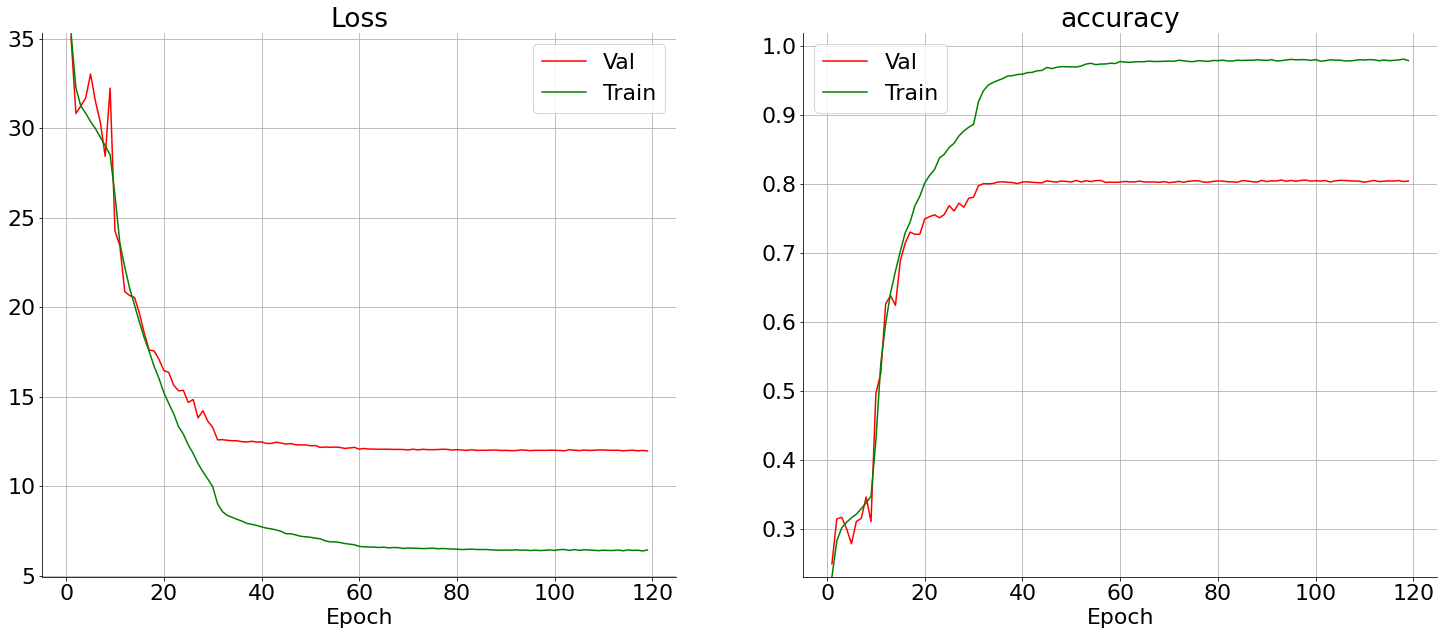

In [3]:
log_dir = 'saved/logs'
run_id = ['0731_232453']

plot_loss_accuracy(
    dpath=log_dir,
    list_dname=run_id,
    list_metrics=['Loss', 'accuracy'],
)

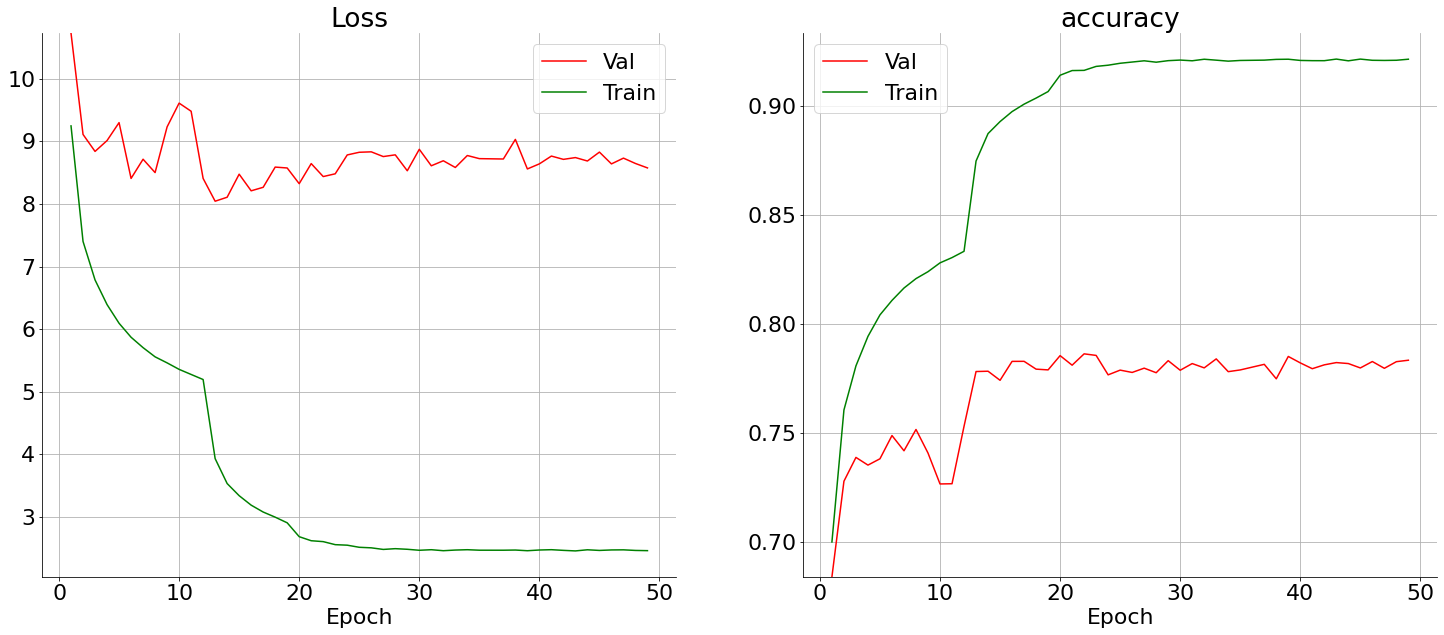

In [4]:
log_dir = 'saved/logs'
run_id = ['0730_142502', '0730_184508']

plot_loss_accuracy(
    dpath=log_dir,
    list_dname=run_id,
    list_metrics=['Loss', 'accuracy'],
)

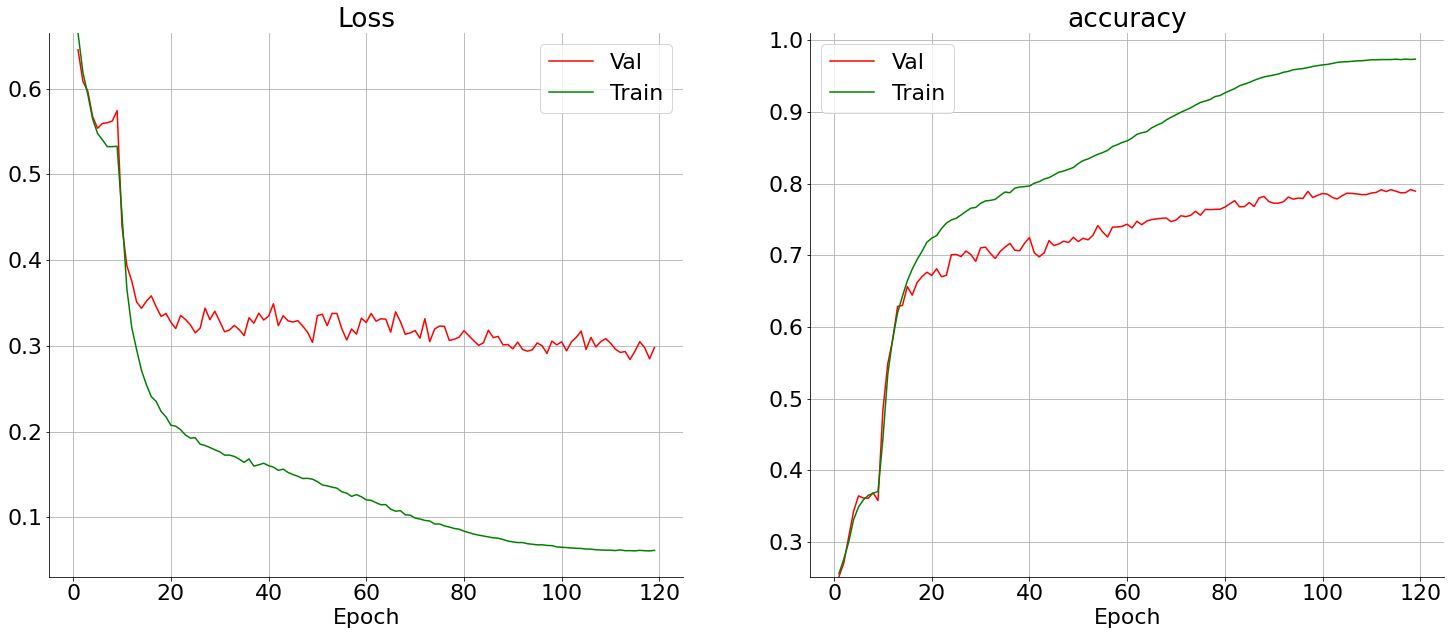

In [5]:
log_dir = 'saved/logs'
run_id = ['0828_014444', '0828_112607']

plot_loss_accuracy(
    dpath=log_dir,
    list_dname=run_id,
    list_metrics=['Loss', 'accuracy'],
)